In [ ]:
!pip install facenet-pytorch

In [45]:
import requests

def get_img(url, img_path):
  req = requests.get(url, stream=True)
  with open(img_path, "wb") as f:
    for chunk in req.iter_content():
      f.write(chunk)

get_img('https://cdn.britannica.com/67/215267-050-4487C49F/American-actor-Adam-Driver-2020.jpg', 'img1.jpg')
get_img('https://cdn.britannica.com/11/215011-050-3127A07E/American-actor-Keanu-Reeves-2014.jpg','img2.jpg')
get_img('https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Reuni%C3%A3o_com_o_ator_norte-americano_Keanu_Reeves_%2846806576944%29_%28cropped%29.jpg/800px-Reuni%C3%A3o_com_o_ator_norte-americano_Keanu_Reeves_%2846806576944%29_%28cropped%29.jpg','img3.jpg')

import PIL
def img2np(img_path, width, height):
  img = PIL.Image.open(img_path)
  img = img.resize((width,height))
  return img


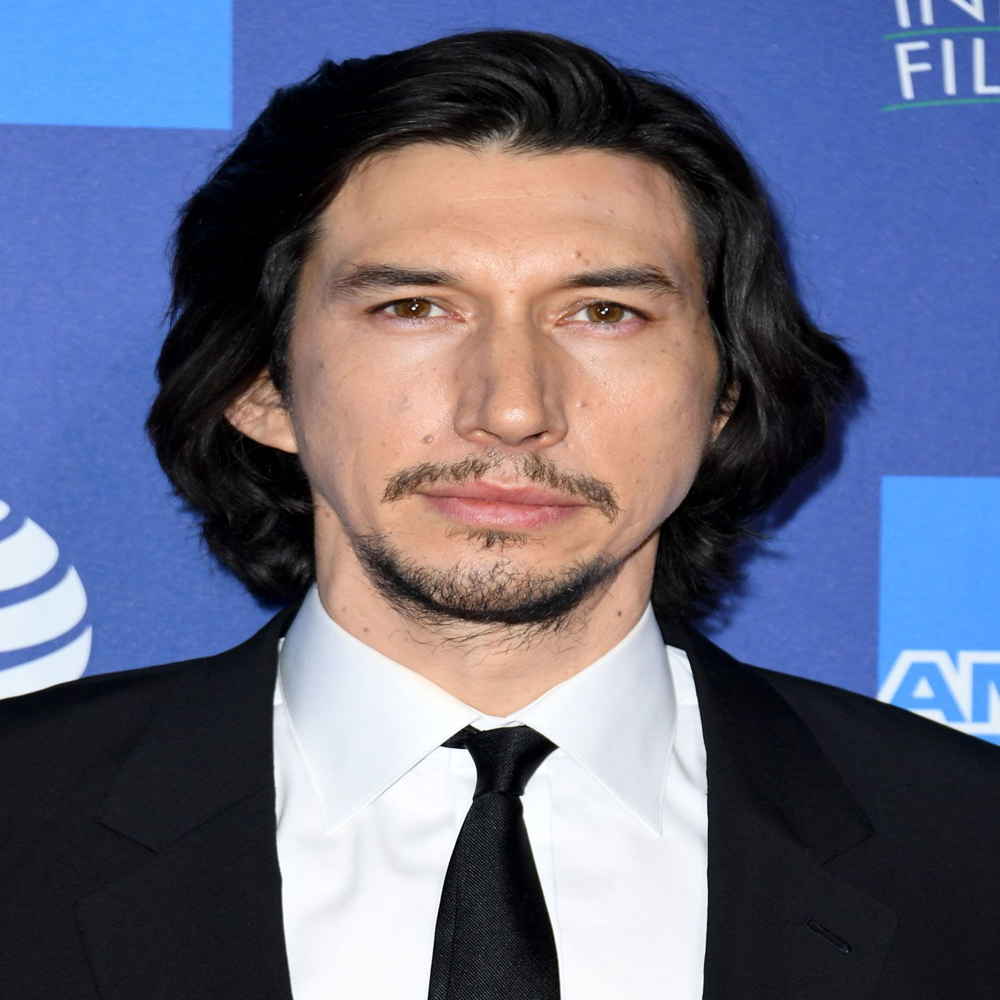

In [48]:
img1 = img2np('img1.jpg', 1000, 1000)
img1

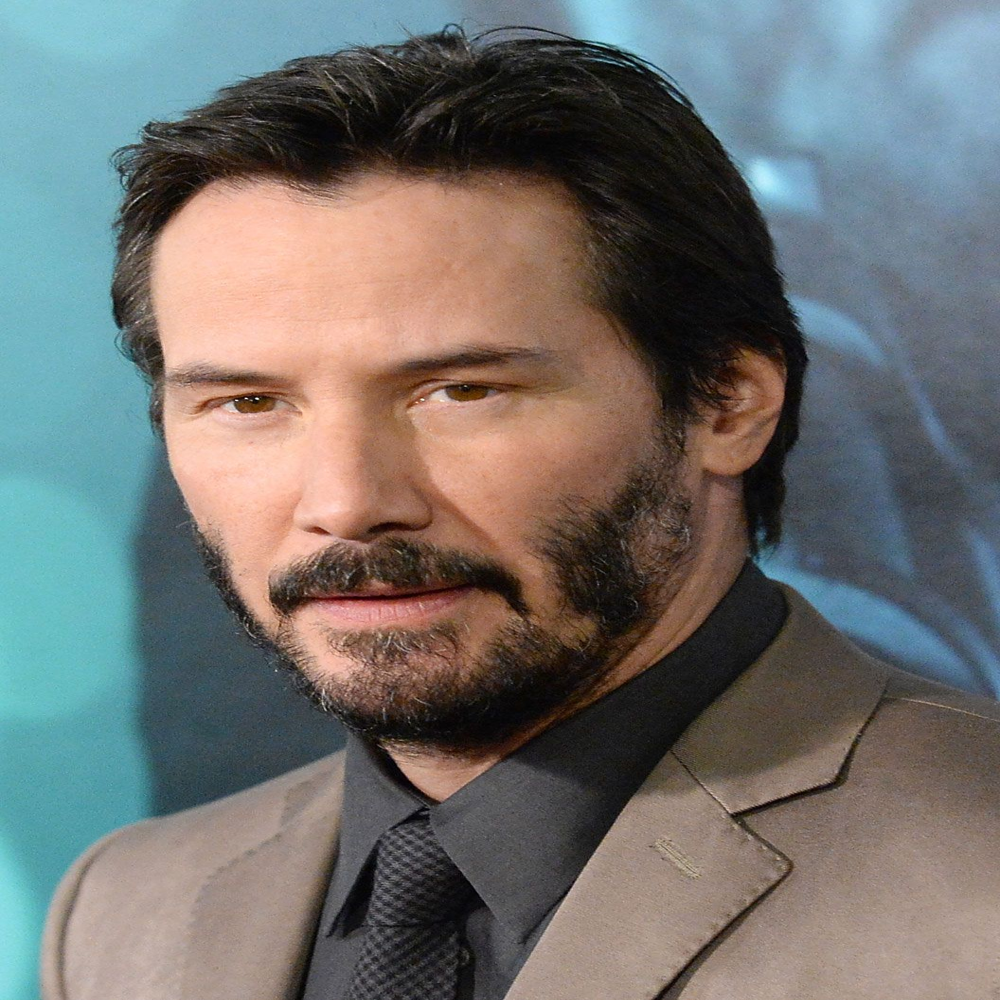

In [49]:
img2 = img2np('img2.jpg', 1000, 1000)
img2

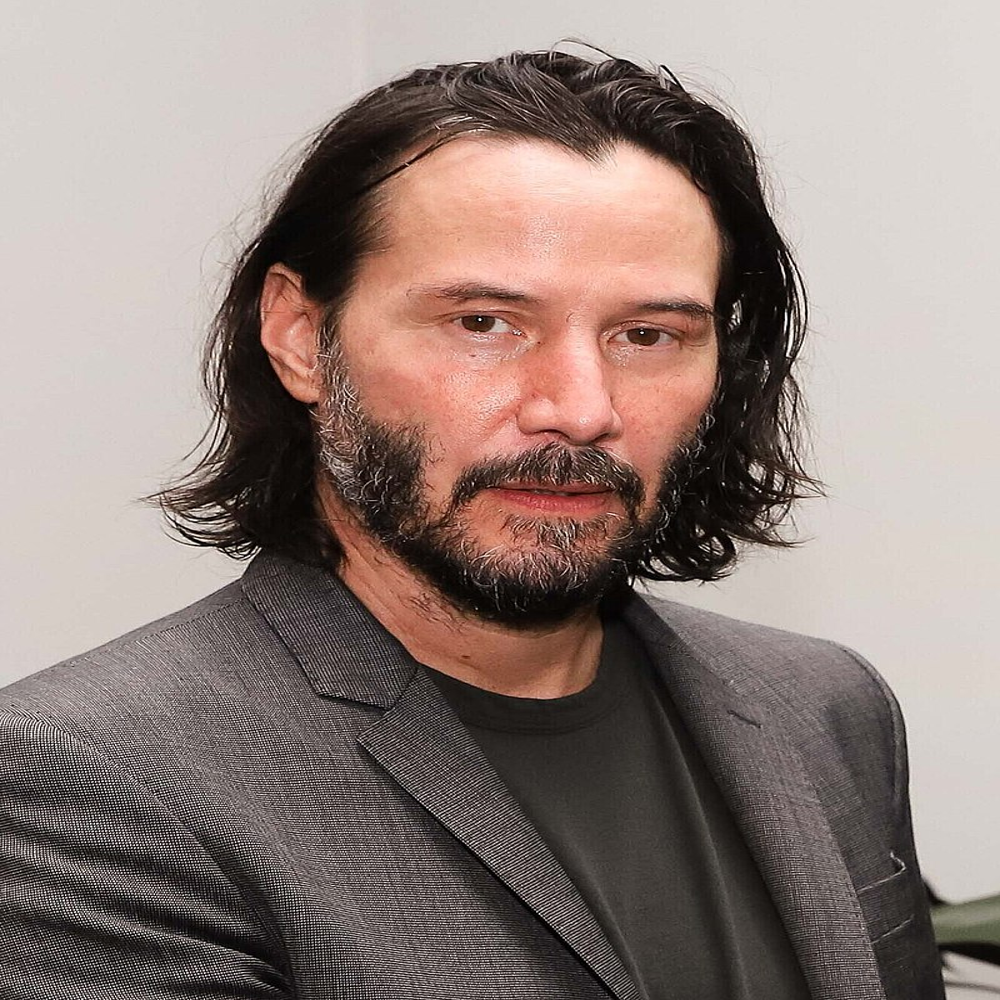

In [50]:
img3 = img2np('img3.jpg', 1000, 1000)
img3

In [58]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN()

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [59]:
# Get cropped and prewhitened image tensor
img_cropped1 = mtcnn(img1)
img_cropped2 = mtcnn(img2)
img_cropped3 = mtcnn(img3)

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding1 = resnet(img_cropped1.unsqueeze(0))
img_embedding2 = resnet(img_cropped2.unsqueeze(0))
img_embedding3 = resnet(img_cropped3.unsqueeze(0))

import torch.nn.functional as F
dist1 = F.pairwise_distance(img_embedding1, img_embedding2, p=2)
dist2 = F.pairwise_distance(img_embedding2, img_embedding3, p=2)
dist3 = F.pairwise_distance(img_embedding1, img_embedding3, p=2)
print(dist1)
print(dist2)
print(dist3)

tensor([1.1643], grad_fn=<NormBackward1>)
tensor([0.5167], grad_fn=<NormBackward1>)
tensor([1.1902], grad_fn=<NormBackward1>)


In [68]:
from matplotlib import pyplot as plt

face1 = mtcnn.detect(img1)

face1

(array([[306.99566650390625, 118.97863006591797, 690.2796020507812,
         604.5315551757812]], dtype=object),
 array([0.9995649456977844], dtype=object))